## Create Synthetic Dataset of Git Commands

In this notebook we will use the following structure to create a synthetic dataset of Intructions and Git Commands.
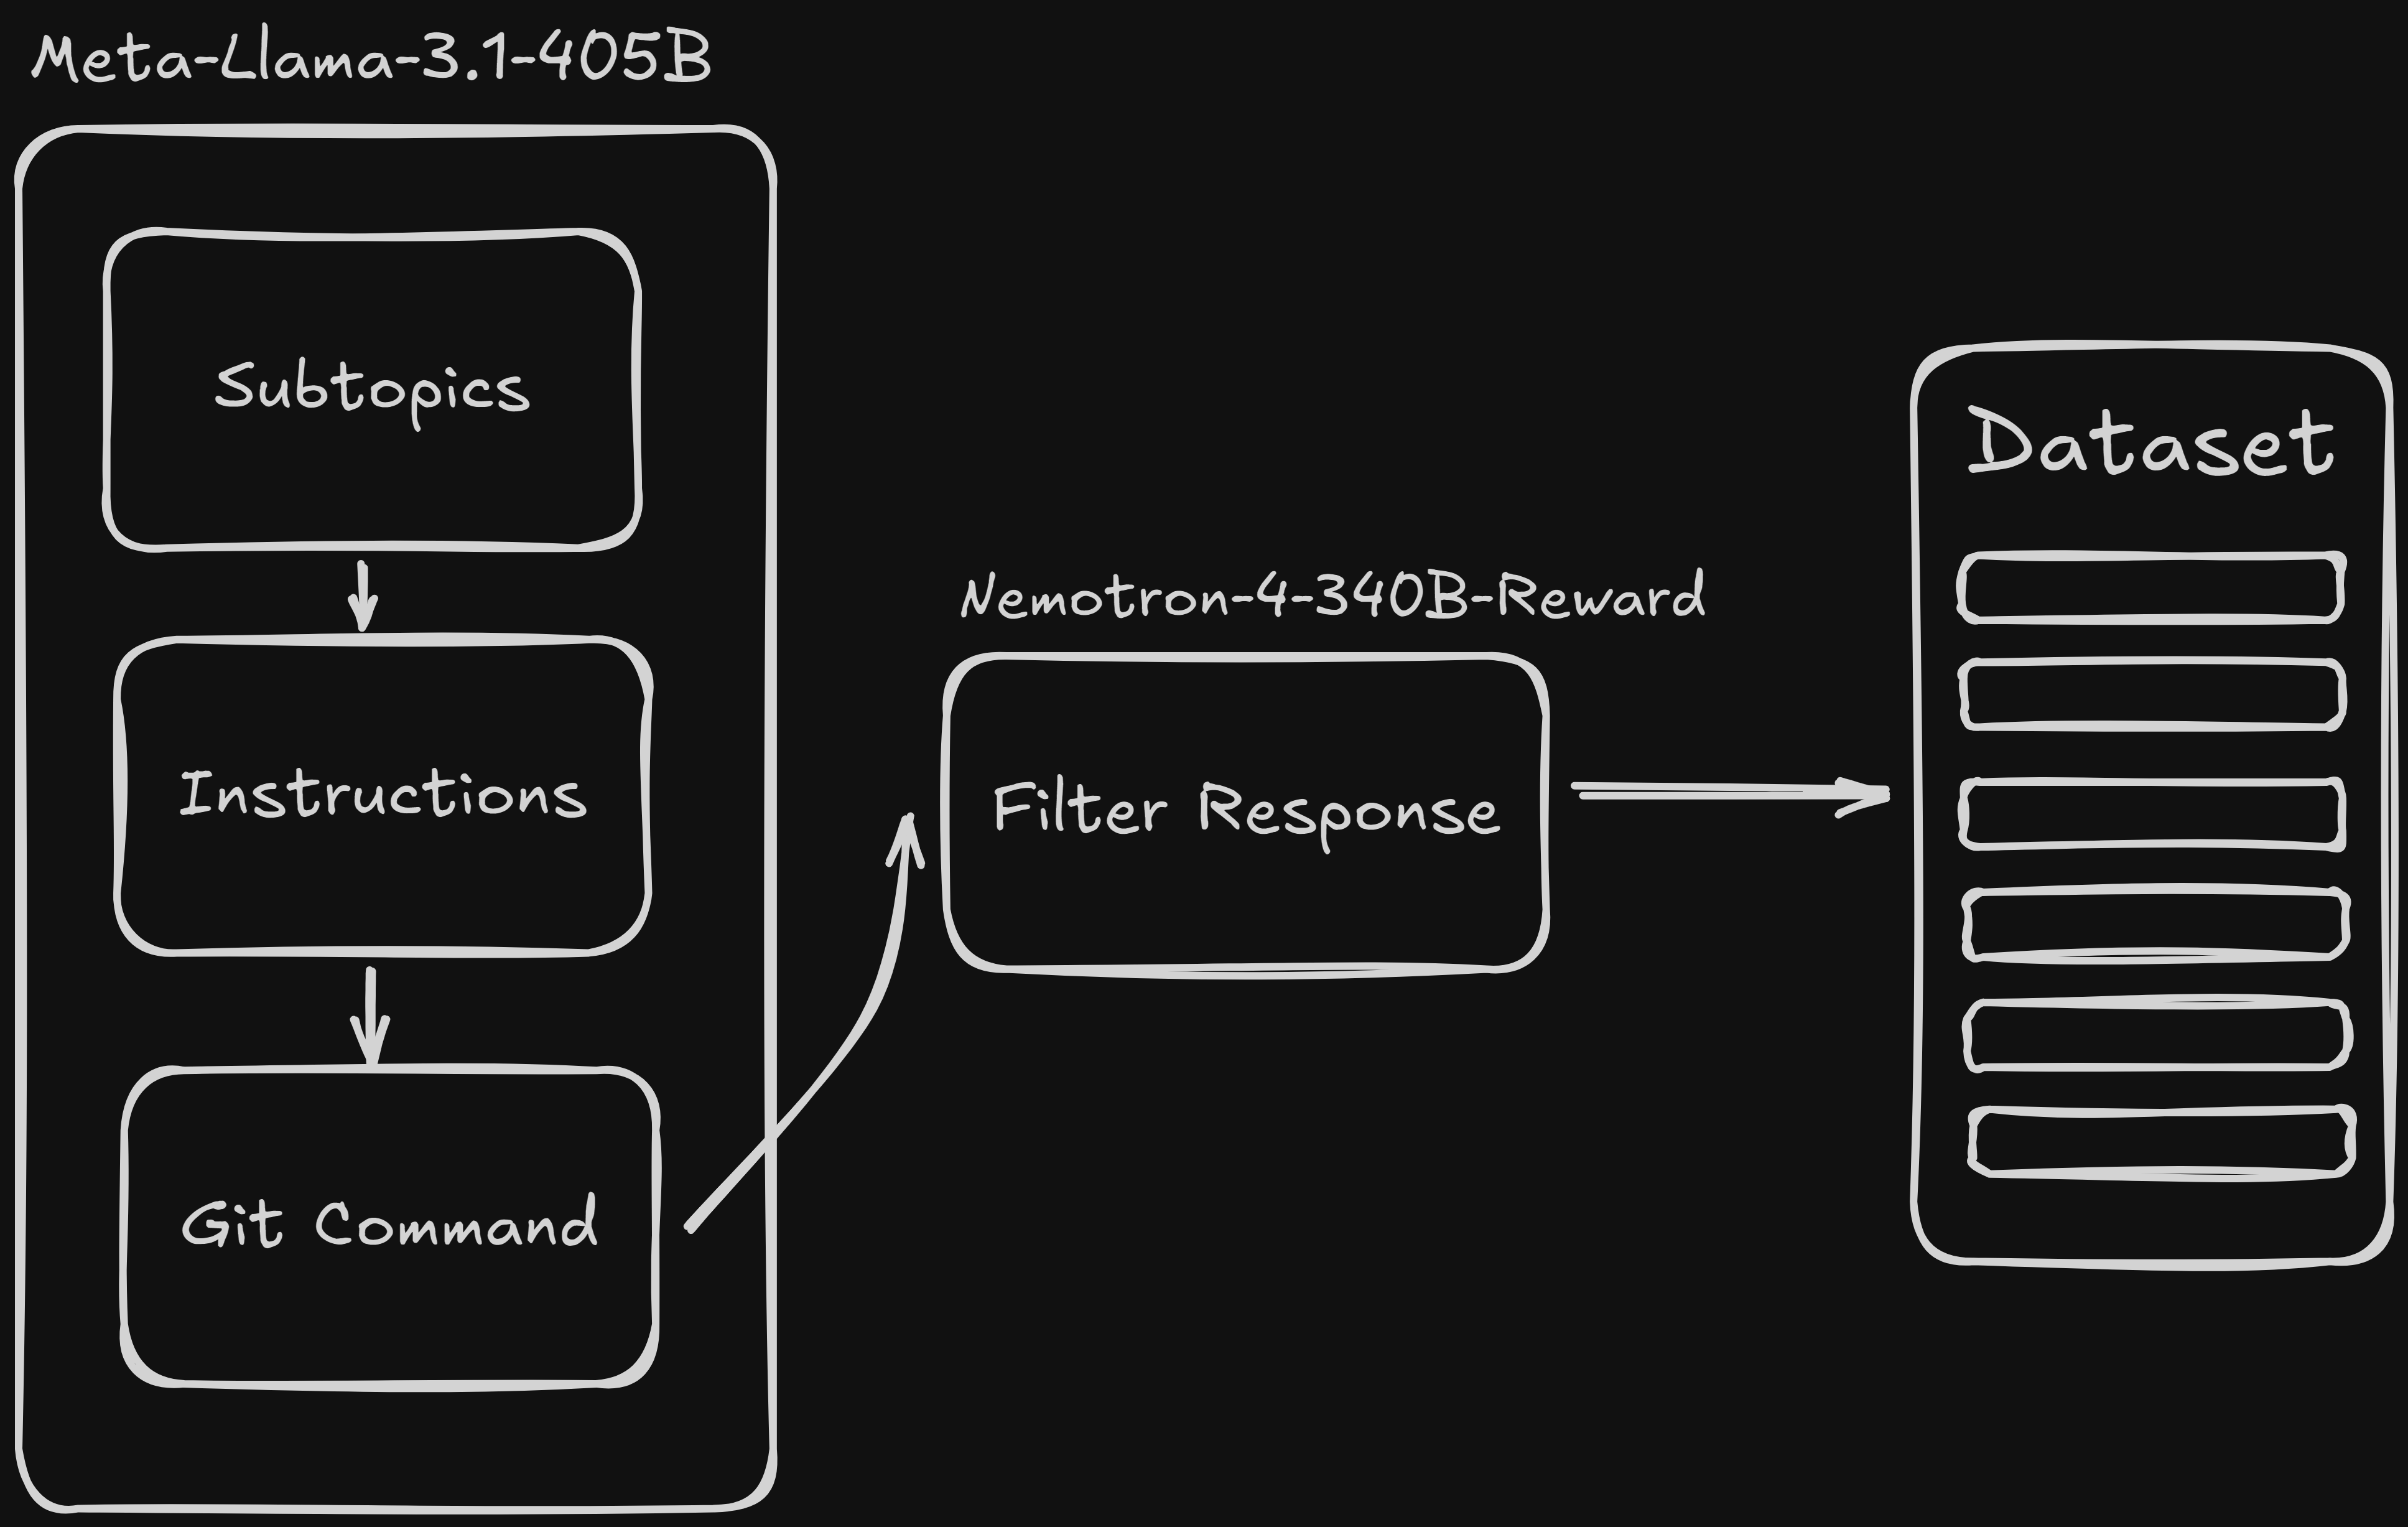

In [1]:
from rich import print
import os
from openai import OpenAI
from datasets import Dataset, DatasetDict, load_dataset
import json
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [2]:
client = OpenAI(
    base_url="https://integrate.api.nvidia.com/v1",
    api_key=os.environ["NVIDIA_API_KEY"]
)

In [3]:
# 1. Subtopics Generation
n_subtopics = 5

TOPIC_GENERATION_PROMPT_TEMPLATE = """\
I want to create a synthetic dataset of natural language and Git commands. Based on this context, give me {n_subtopics} subtopics
to cover what needs to be covered when working with Git. 

The list must be without numbers, and without any description of the subtopics. The subtopics should be separated by a comma. There must be no other text than the list.
"""

def generate_subtopics(client, n_subtopics):
    prompt = TOPIC_GENERATION_PROMPT_TEMPLATE.format(n_subtopics=n_subtopics)
    response = client.chat.completions.create(
        model="meta/llama-3.1-405b-instruct",
        messages=[
            {"role": "user",
             "content": prompt}
        ],
        temperature=0.2,
        top_p=0.7,
    )
    return response

responses = generate_subtopics(client, n_subtopics=n_subtopics)
print(responses.choices[0].message.content)

Branching, Merging, Committing, Remote repositories, Resolving conflicts

In [14]:
# 2. Instruction Generation
n_instructions = 100

INSTRUCTION_PROMPT_TEMPLATE = """\
The objective is to create a dataset of user instructions in natural language that should be returned by Git commands.
Given a topic in Git, generate {n_instructions} possible concise instructions that could be given to an AI assitant about that topic.
Write some of these instructions as if given by someone with limited knowledge of Git terminologies and knowledge, 
like a beginner programmer. Your response should be in a list format.

The topic is: {sub_topic}
The list must be without numbers. The questions/instructions should be separated by a newline character. There must be no other text than the list.
"""
subtopic_list = responses.choices[0].message.content.split(",")
def generate_instructions(client, sub_topic, n_instructions):
    print(f"Generating Instructions for {sub_topic}.")
    prompt = INSTRUCTION_PROMPT_TEMPLATE.format(sub_topic=sub_topic, n_instructions=n_instructions)
    response = client.chat.completions.create(
        model="meta/llama-3.1-405b-instruct",
        messages=[
            {"role": "user",
             "content": prompt}
        ],
        temperature=0.2,
        top_p=0.7,
    )
    return response.choices[0].message.content


def instructions_generator(client, subtopic_list, n_instructions):
    instruction_list = [generate_instructions(client, subtopic, n_instructions) for subtopic in subtopic_list]
    return instruction_list

instruction_list = instructions_generator(client, subtopic_list, n_instructions)

instruction_list_formatted = []
for instruction_set in instruction_list:
    instruction_list_formatted.extend([instruction.strip() for instruction in instruction_set.split("\n") if instruction])
print(instruction_list_formatted)

Generating Instructions for Branching.

Generating Instructions for  Merging.

Generating Instructions for  Committing.

Generating Instructions for  Remote repositories.

Generating Instructions for  Resolving conflicts.

[
    'Create a new branch for my feature',
    'Make a branch to work on a new thing',
    'I want to make a copy of the main code so I can try some stuff',
    'How do I make a new line of code changes',
    "Create a branch from the current branch I'm on",
    'I need to work on a new feature without messing up the main code',
    'Make a new branch and switch to it',
    'Can you make a branch for me and name it "new-feature"',
    'I want to try some new code without ruining everything',
    'Create a branch from a specific commit',
    'Make a branch that copies the current state of the main branch',
    'How do I make a branch to work on a bug fix',
    'Create a new branch and name it "my-feature"',
    'Make a branch that I can use to test some new code',
    "I want to create a branch but I don't know what to name it",
    'Can you make a branch that is a copy of another branch',
    'Make a new branch so I can work on it independently',
    'How do I create a branch in Git',
    'Create a branch for a new project',
    'I want to make a branch that is based on an older version of the code',
    'Make a branch that I can merge back into the main branch later',
    'Can you create a branch for me and switch to it',
    'Create a branch to work on a specific task',
    'Make a branch that is separate from the main code',
    'How do I make a branch to work on a new feature',
    "I want to create a branch but I'm not sure what to do",
    'Make a branch that I can use to try out some new ideas',
    'Can you make a branch that is a copy of the current branch',
    'Create a branch for a new idea I want to try',
    'Make a branch that I can work on without affecting the main code',
    'How do I create a new branch in Git',
    'I want to make a branch that is based on a specific commit',
    'Make a branch that I can use to test some new code changes',
    'Can you create a branch for me and name it "feature-1"',
    'Create a branch to work on a bug fix',
    'Make a branch that is a copy of another branch',
    'How do I make a branch to work on a new project',
    "I want to create a branch but I don't know how",
    'Make a branch that I can merge back into the main branch',
    'Can you make a branch that is separate from the main code',
    'Create a branch for a new feature I want to add',
    'Make a branch that I can use to try out some new code',
    'How do I create a branch in Git and switch to it',
    'I want to make a branch that is based on an older version of the code',
    'Make a branch that I can work on independently',
    'Can you create a branch for me and name it "my-branch"',
    'Create a branch to work on a specific task',
    'Make a branch that is a copy of the current state of the main branch',
    'How do I make a branch to work on a bug fix',
    "I want to create a branch but I'm not sure what to name it",
    'Make a branch that I can use to test some new code',
    'Can you make a branch that is a copy of another branch',
    'Create a branch for a new project I want to start',
    'Make a branch that I can work on without affecting the main code',
    'How do I create a new branch in Git and switch to it',
    'I want to make a branch that is based on a specific commit',
    'Make a branch that I can use to try out some new ideas',
    'Can you create a branch for me and name it "feature-2"',
    'Create a branch to work on a new feature',
    'Make a branch that is separate from the main code',
    'How do I make a branch to work on a new thing',
    "I want to create a branch but I don't know how",
    'Make a branch that I can merge back into the main branch later',
    'Can you make a branch that is a copy of the current branch',
    'Create a branch for a bug fix I want to work on',
    'Make a branch that I can use to test some new code changes',
    'How do I create a branch in Git and name it',
    'I want to make a branch that is based on an older version of the code',
    

In [24]:
# 3. Responses Generation
RESPONSE_PROMPT_TEMPLATE = """\
Given an question/instruction related to Git, generate a response that could be given. 
Keep the response on-topic, informative, concise.

The user prompt is: {instruction}
"""
def generate_responses(client, instruction):
    prompt = RESPONSE_PROMPT_TEMPLATE.format(instruction=instruction)
    response = client.chat.completions.create(
        model="meta/llama-3.1-405b-instruct",
        messages=[
            {"role": "user",
             "content": prompt}
        ],
        temperature=0.2,
        top_p=0.7,
        max_tokens=1024,
    )
    return response.choices[0].message.content

def response_generator(client, instruction_list):
    response_list = [generate_responses(client, instruction) for instruction in instruction_list]
    return response_list

instruction_response_list = response_generator(client, instruction_list_formatted)
instruction_response_pair_list = []
for instruction, response in zip(instruction_list_formatted, instruction_response_list):
    instruction_response_pair_list.append(
        {
            "instruction": instruction,
            "responses": response,
        }
    )

In [25]:
with open('synthetic_data.jsonl', 'w') as f:
    for item in instruction_response_pair_list:
        f.write(json.dumps(item))
        f.write('\n')